In [2]:
import xarray as xr

In [5]:
ds = xr.open_dataset("data/reservoir_results_all.nc?sv=2020-04-08", chunks='auto')
ds

<xarray.Dataset>
Dimensions:    (GrandID: 3248, time: 18262)
Coordinates:
  * time       (time) datetime64[ns] 1970-01-01 1970-01-02 ... 2019-12-31
  * GrandID    (GrandID) int32 1284 1677 2232 6472 508 ... 4642 4501 2538 2490
Data variables: (12/13)
    latitude   (GrandID) float32 dask.array<chunksize=(3248,), meta=np.ndarray>
    longitude  (GrandID) float32 dask.array<chunksize=(3248,), meta=np.ndarray>
    P_res      (time, GrandID) float32 dask.array<chunksize=(9131, 3248), meta=np.ndarray>
    Ea_res     (time, GrandID) float32 dask.array<chunksize=(9131, 3248), meta=np.ndarray>
    Qout_res   (time, GrandID) float32 dask.array<chunksize=(9131, 3248), meta=np.ndarray>
    Qin_res    (time, GrandID) float32 dask.array<chunksize=(9131, 3248), meta=np.ndarray>
    ...         ...
    FracFull   (time, GrandID) float32 dask.array<chunksize=(9131, 3248), meta=np.ndarray>
    P          (time, GrandID) float32 dask.array<chunksize=(9131, 3248), meta=np.ndarray>
    ETa        (time, GrandID) float32 dask.array<chunksize=(9131, 3248), meta=np.ndarray>
    Snow       (time, GrandID) float32 dask.array<chunksize=(9131, 3248), meta=np.ndarray>
    Melt       (time, GrandID) float32 dask.array<chunksize=(9131, 3248), meta=np.ndarray>
    Temp       (time, GrandID) float32 dask.array<chunksize=(9131, 3248), meta=np.ndarray>

#### Select a subset of reservoirs

In [5]:
ds.isel(GrandID=slice(500, 1000))

<xarray.Dataset>
Dimensions:    (GrandID: 500, time: 18262)
Coordinates:
  * time       (time) datetime64[ns] 1970-01-01 1970-01-02 ... 2019-12-31
  * GrandID    (GrandID) int32 1013 1873 2235 857 860 ... 3624 160 6517 345 1769
Data variables: (12/13)
    latitude   (GrandID) float32 dask.array<chunksize=(500,), meta=np.ndarray>
    longitude  (GrandID) float32 dask.array<chunksize=(500,), meta=np.ndarray>
    P_res      (time, GrandID) float32 dask.array<chunksize=(9131, 500), meta=np.ndarray>
    Ea_res     (time, GrandID) float32 dask.array<chunksize=(9131, 500), meta=np.ndarray>
    Qout_res   (time, GrandID) float32 dask.array<chunksize=(9131, 500), meta=np.ndarray>
    Qin_res    (time, GrandID) float32 dask.array<chunksize=(9131, 500), meta=np.ndarray>
    ...         ...
    FracFull   (time, GrandID) float32 dask.array<chunksize=(9131, 500), meta=np.ndarray>
    P          (time, GrandID) float32 dask.array<chunksize=(9131, 500), meta=np.ndarray>
    ETa        (time, GrandID) float32 dask.array<chunksize=(9131, 500), meta=np.ndarray>
    Snow       (time, GrandID) float32 dask.array<chunksize=(9131, 500), meta=np.ndarray>
    Melt       (time, GrandID) float32 dask.array<chunksize=(9131, 500), meta=np.ndarray>
    Temp       (time, GrandID) float32 dask.array<chunksize=(9131, 500), meta=np.ndarray>

#### Mean precipitation of all reservoirs, single year

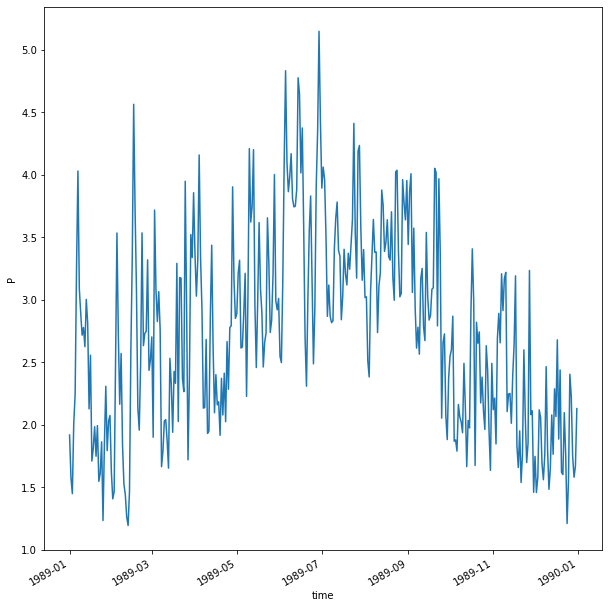

In [6]:
precip_yr = ds.P.sel(time="1989")
g = precip_yr.groupby("time")
g.mean(...).plot(figsize=(10,10))

/srv/conda/envs/notebook/lib/python3.8/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


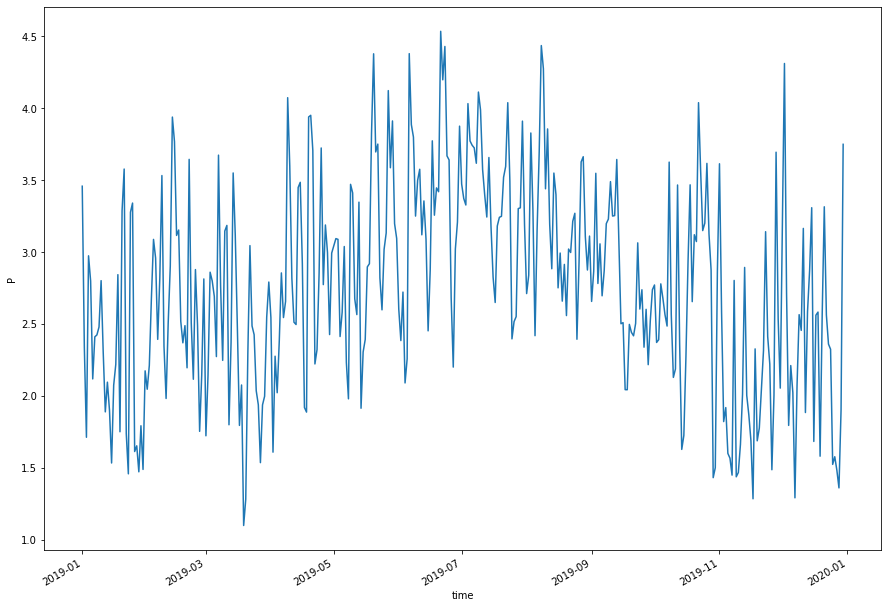

In [7]:
precip_yr = ds.P.sel(time="2019")
g = precip_yr.groupby("time")
g.mean(...).plot(figsize=(15,10))

In [8]:
res = ds.sel(GrandID=900)
res

<xarray.Dataset>
Dimensions:    (time: 18262)
Coordinates:
  * time       (time) datetime64[ns] 1970-01-01 1970-01-02 ... 2019-12-31
    GrandID    int32 900
Data variables: (12/13)
    latitude   float32 dask.array<chunksize=(), meta=np.ndarray>
    longitude  float32 dask.array<chunksize=(), meta=np.ndarray>
    P_res      (time) float32 dask.array<chunksize=(9131,), meta=np.ndarray>
    Ea_res     (time) float32 dask.array<chunksize=(9131,), meta=np.ndarray>
    Qout_res   (time) float32 dask.array<chunksize=(9131,), meta=np.ndarray>
    Qin_res    (time) float32 dask.array<chunksize=(9131,), meta=np.ndarray>
    ...         ...
    FracFull   (time) float32 dask.array<chunksize=(9131,), meta=np.ndarray>
    P          (time) float32 dask.array<chunksize=(9131,), meta=np.ndarray>
    ETa        (time) float32 dask.array<chunksize=(9131,), meta=np.ndarray>
    Snow       (time) float32 dask.array<chunksize=(9131,), meta=np.ndarray>
    Melt       (time) float32 dask.array<chunksize=(9131,), meta=np.ndarray>
    Temp       (time) float32 dask.array<chunksize=(9131,), meta=np.ndarray>

In [18]:
# Looks strange 
res.Temp.groupby("time.month").mean().values

/srv/conda/envs/notebook/lib/python3.8/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


array([inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf],
      dtype=float32)

In [10]:
# But does seem flat...but large?
res.Temp[100:200].values


array([9.96921e+36, 9.96921e+36, 9.96921e+36, 9.96921e+36, 9.96921e+36,
       9.96921e+36, 9.96921e+36, 9.96921e+36, 9.96921e+36, 9.96921e+36,
       9.96921e+36, 9.96921e+36, 9.96921e+36, 9.96921e+36, 9.96921e+36,
       9.96921e+36, 9.96921e+36, 9.96921e+36, 9.96921e+36, 9.96921e+36,
       9.96921e+36, 9.96921e+36, 9.96921e+36, 9.96921e+36, 9.96921e+36,
       9.96921e+36, 9.96921e+36, 9.96921e+36, 9.96921e+36, 9.96921e+36,
       9.96921e+36, 9.96921e+36, 9.96921e+36, 9.96921e+36, 9.96921e+36,
       9.96921e+36, 9.96921e+36, 9.96921e+36, 9.96921e+36, 9.96921e+36,
       9.96921e+36, 9.96921e+36, 9.96921e+36, 9.96921e+36, 9.96921e+36,
       9.96921e+36, 9.96921e+36, 9.96921e+36, 9.96921e+36, 9.96921e+36,
       9.96921e+36, 9.96921e+36, 9.96921e+36, 9.96921e+36, 9.96921e+36,
       9.96921e+36, 9.96921e+36, 9.96921e+36, 9.96921e+36, 9.96921e+36,
       9.96921e+36, 9.96921e+36, 9.96921e+36, 9.96921e+36, 9.96921e+36,
       9.96921e+36, 9.96921e+36, 9.96921e+36, 9.96921e+36, 9.969

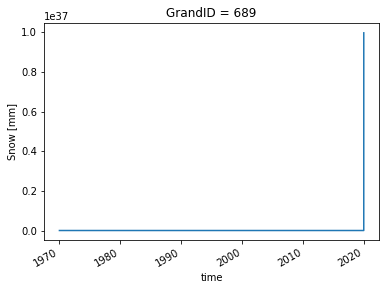

In [9]:
res.Snow.plot()

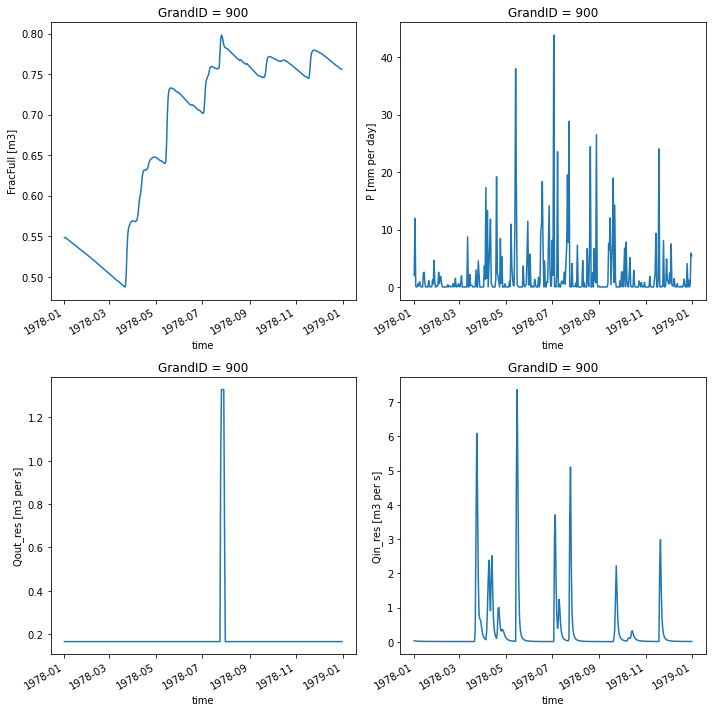

In [21]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(10,10))


year = res.sel(time="1978")

year.FracFull.plot(ax=axes[0][0])
year.P.plot(ax=axes[0][1])
year.Qout_res.plot(ax=axes[1][0])
year.Qin_res.plot(ax=axes[1][1])

plt.tight_layout()
plt.draw()

IndexError: tuple index out of range

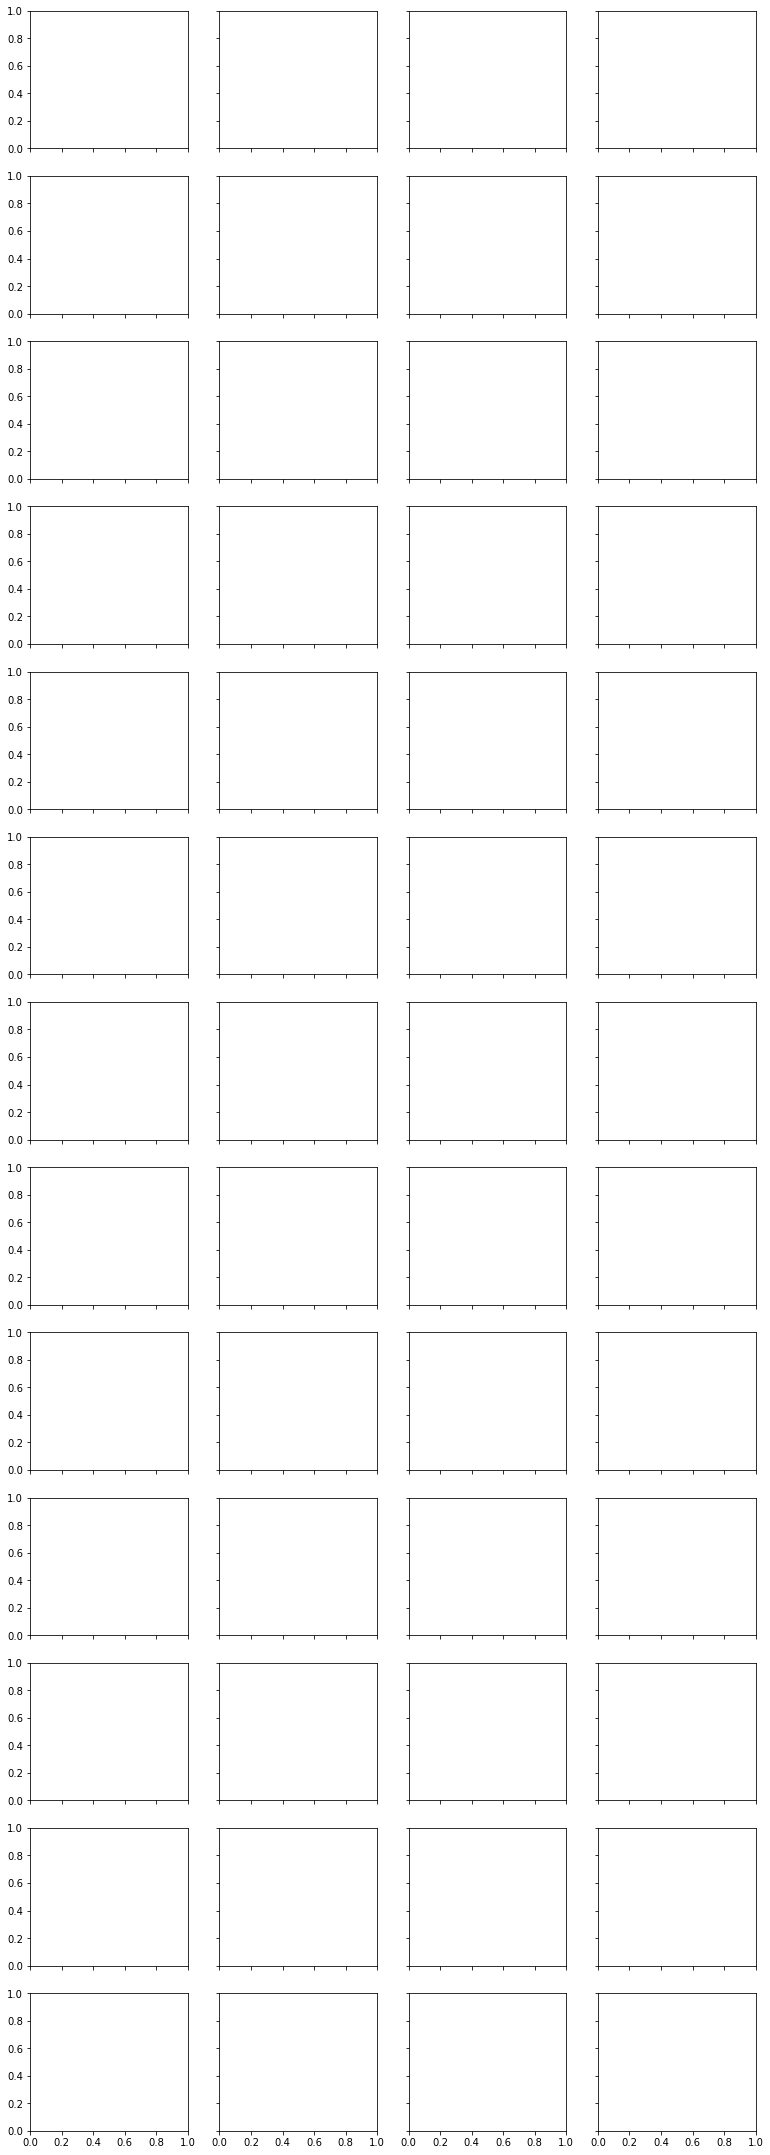

In [37]:
yearly_vol = res.FracFull.groupby("time.year").mean()
#yearly_vol.FracFull.attrs = res.FracFull.attrs
yearly_vol
# print(yearly_vol.shape)

fg = yearly_vol.plot.line(
    col="year",
    col_wrap=4,
)
